   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   4.526      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   3.585      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   3.521      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   3.413      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.422      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


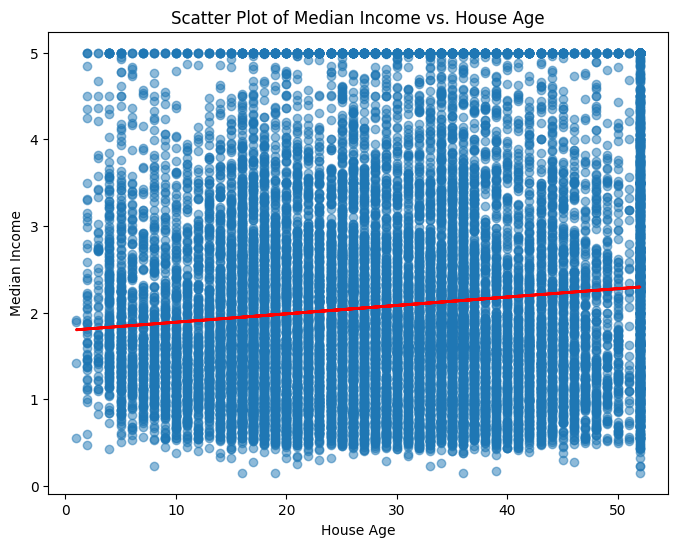

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the California Housing dataset
california = fetch_california_housing()

# Create a Pandas DataFrame for the dataset
california_df = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable to the DataFrame
california_df['MedInc'] = california.target
print(california_df.head())
# Select the independent variable and target variable
X = california_df[['HouseAge']]
y = california_df['MedInc']

# Fit a linear regression model to the data
lr = LinearRegression()
lr.fit(X, y)

# Plot a scatter plot of the data
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5)
plt.title("Scatter Plot of Median Income vs. House Age")
plt.xlabel("House Age")
plt.ylabel("Median Income")

# Plot the linear regression line
plt.plot(X, lr.predict(X), color='red', linewidth=2)

plt.show()


Mean squared error: 1.3106960720039365


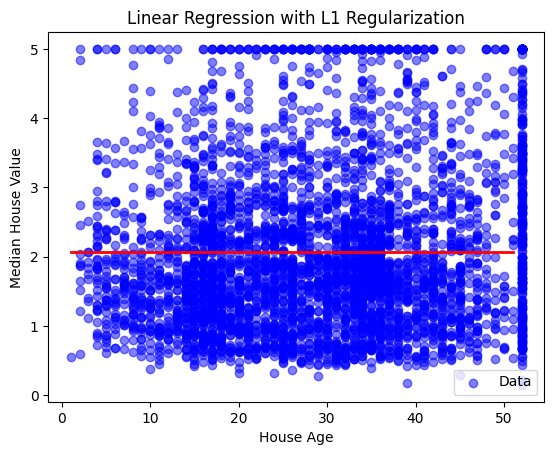

In [2]:
# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

# Load the dataset into a Pandas DataFrame
cali = fetch_california_housing(as_frame=True)
cali_df = cali.data

# Extract the input and output features
X = cali_df['HouseAge'].values.reshape(-1,1)
y = cali.target.values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model with L1 regularization to the training data
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=100000)
lasso.fit(X_train, y_train)

# Compute the mean squared error on the test data
from sklearn.metrics import mean_squared_error

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Plot the linear regression line with L1 regularization
import numpy as np
import matplotlib.pyplot as plt

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lasso.predict(line_X)
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data')
plt.plot(line_X, line_y, color='red', linewidth=2)
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.title('Linear Regression with L1 Regularization')
plt.legend(loc='lower right')
plt.show()


Mean squared error: 1.29396172748212


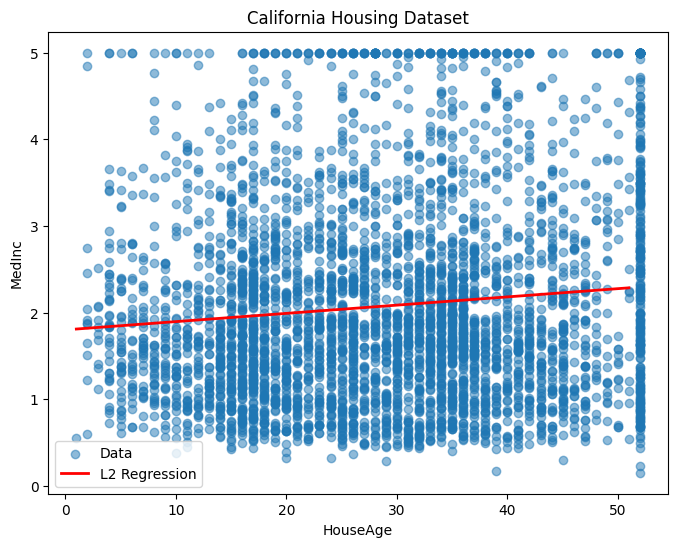

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

# Load the dataset into a Pandas DataFrame
cali = fetch_california_housing(as_frame=True)
cali_df = cali.data

# Extract the input and output features
X = cali_df['HouseAge'].values.reshape(-1,1)
y = cali.target.values


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply L2 regularization
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Calculate the mean squared error on the test set
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Plot a scatter plot of MedInc vs. HouseAge
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.5, label='Data')

# Add the linear regression line to the plot
line_X = np.arange(X_test.min(), X_test.max())[:, np.newaxis]
line_y = ridge.predict(line_X)
plt.plot(line_X, line_y, color='red', linewidth=2, label='L2 Regression')

plt.xlabel('HouseAge')
plt.ylabel('MedInc')
plt.title('California Housing Dataset')
plt.legend()
plt.show()


Mean squared error (alpha=0.1): 1.2941271268040548


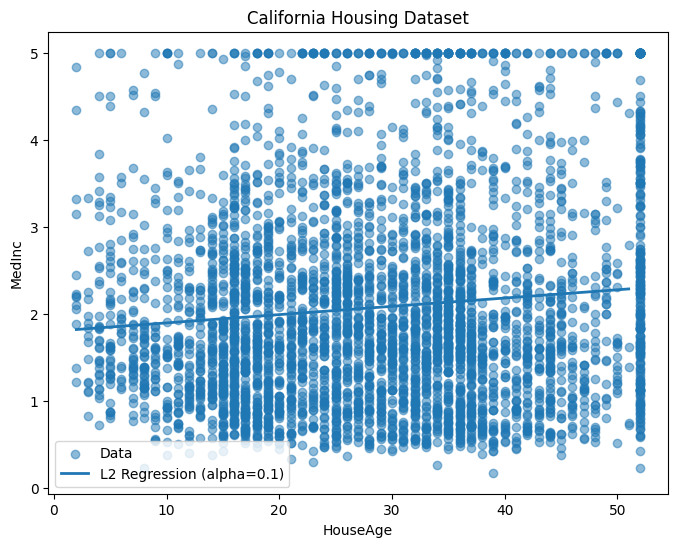

Mean squared error (alpha=1): 1.2941271276711872


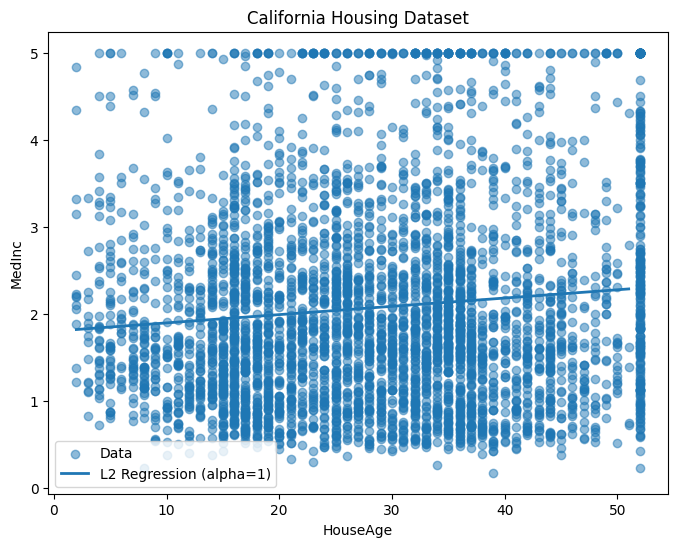

Mean squared error (alpha=10): 1.2941271363426547


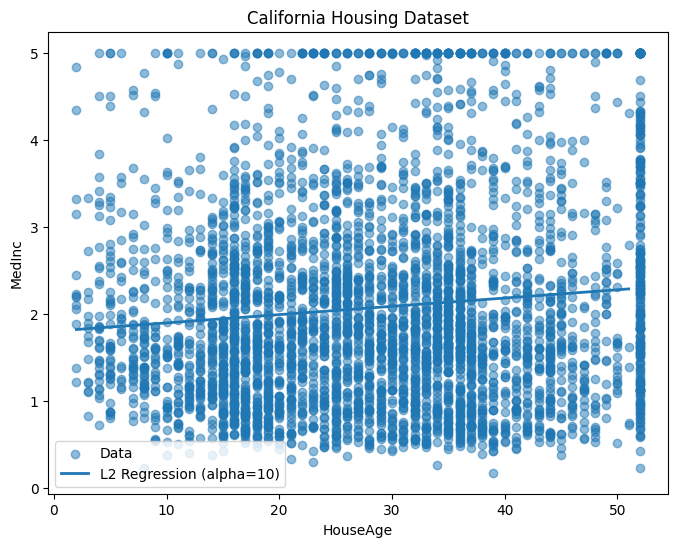

Mean squared error (alpha=100): 1.294127223071919


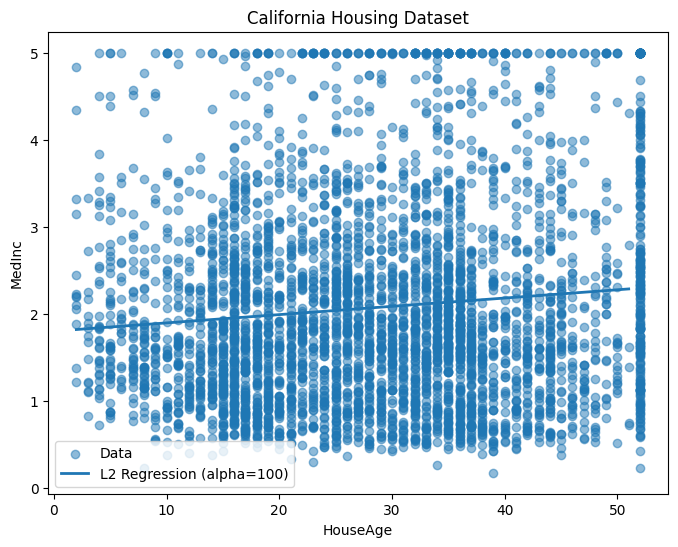

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
from sklearn.datasets import fetch_california_housing

# Load the dataset into a Pandas DataFrame
cali = fetch_california_housing(as_frame=True)
cali_df = cali.data

# Extract the input and output features
X = cali_df['HouseAge'].values.reshape(-1, 1)
y = cali.target.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

# Test different values of alpha
alphas = [0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    # Calculate the mean squared error on the test set
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error (alpha={alpha}): {mse}')

    # Plot a scatter plot of MedInc vs. HouseAge
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test, alpha=0.5, label='Data')

    # Add the linear regression line to the plot
    line_X = np.arange(X_test.min(), X_test.max())[:, np.newaxis]
    line_y = ridge.predict(line_X)
    plt.plot(line_X, line_y, linewidth=2, label=f'L2 Regression (alpha={alpha})')

    plt.xlabel('HouseAge')
    plt.ylabel('MedInc')
    plt.title('California Housing Dataset')
    plt.legend()
    plt.show()
